# Description
Hello,I am ihsan.
I will mention this notebook. But firstly This notebook is my ninth notebook in way of improving my self. Beforehand I have done projects the Data Science and Machine Learning. I will share below the description. If I have to mention this notebook I will apply two clustering models of Machine Learning to the dataset. It is the K-Means clustering and Hierarchical clustering models. While I apply The Machine Learning models I will explain them. At the same time, I will review and visualize the dataset. I will start to review the dataset firstly and I will continue to visualize with the plotly library. In this learning path, I would be very happy if you would examine my notebook and help me with how to improve my notebook or what I should do in this development path. I wish you a good day and good work.<br>

[For a detailed description of the dataset, please click here](https://www.kaggle.com/datasets/kandij/mall-customers)

Other my notebook:
- [GPU Search](https://www.kaggle.com/code/ihsncnkz/gpu-search)
- [EDA And Linear Regression](https://www.kaggle.com/code/ihsncnkz/eda-and-linear-regression)
- [Regression Models](https://www.kaggle.com/code/ihsncnkz/regression-models)
- [Logistic Regression](https://www.kaggle.com/code/ihsncnkz/logistic-regression)
- [Classification With K-Nearest Neighbors(KNN)](https://www.kaggle.com/code/ihsncnkz/classification-with-k-nearest-neighbors-knn)
- [Classification With Support Vector Machine(SVM)](https://www.kaggle.com/code/ihsncnkz/classification-with-support-vector-machine-svm)
- [Classification With Naive Bayes Classification](https://www.kaggle.com/code/ihsncnkz/classification-with-naive-bayes-classification)
- [Decision Tree And Random Forest Classifier Models](https://www.kaggle.com/code/ihsncnkz/decision-tree-and-random-forest-classifier-models)

# Contents
- [Data Review](#1)
- [Data Editing](#2)
- [Data Visualization](#3)
- [Clustaring Models](#4)
    - [Data Prapering](#dp1)
    - [K-Means Clustaring](#dp2)
    - [Hierarchical Clustering](#dp3)
- [CONCLUSION](#5)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# plotly
#import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mall-customers/Mall_Customers.csv


# Data Review <a id = "1"></a>

I read the dataset with the pandas library.

In [2]:
data = pd.read_csv("/kaggle/input/mall-customers/Mall_Customers.csv")
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


I drop the column of CustomerID because I don't need it.

In [3]:
data = data.drop(["CustomerID"],axis = 1)
data

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


When I look at the data name of columns I am seeing space the between names of the column. I will fix these.

In [4]:
# information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [5]:
# Dataset Values(Max, min, std..)
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [6]:
# Data Correlation: Relationship between columns
data.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


Visualization of correlation result with seaborn library heatmap.

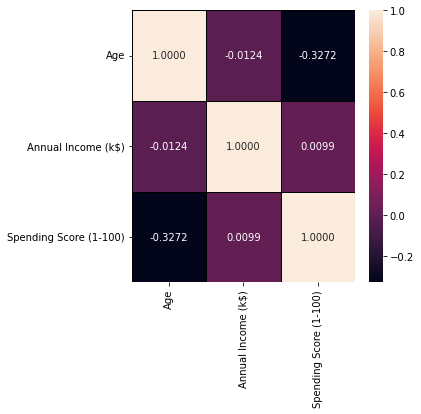

In [7]:
# Visualization of correlation result with seaborn library heatmap.
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(data.corr(), annot = True, linewidths=0.5, linecolor = "black", fmt = ".4f", ax = ax)
plt.show()

Visualization of correlation results with seaborn library pairplot

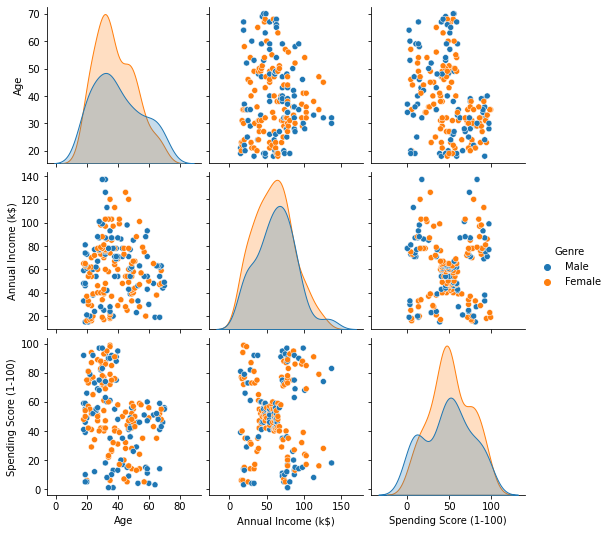

In [8]:
sns.pairplot(data, hue = "Genre")

In [9]:
# Dataset columns names
data.columns

Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

# Data Editing <a id = "2"></a>
I will do changes to the dataset. I will change the name of the columns because the name of the columns have space between and I don't want the space.<br>
I specify the name of the columns in the code below.

In [10]:
data.columns = ["Gender","Age","Annual_Income","Spending_Score"]
data

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


# Data Visualization <a id ="3"></a>
In this chapter, I will visualize the dataset. I will use the plotly library, seaborn library and matplotlib library. The reason I do this, is I want to know what's inside the dataset because this can give us ideas.<br>
I use the seaborn library in the code below. I am looking at inside data in the gender column.

Female    112
Male       88
Name: Gender, dtype: int64

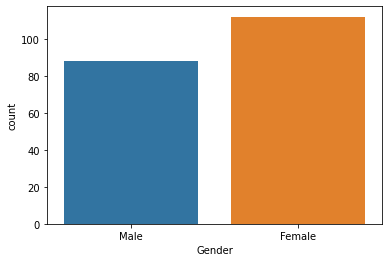

In [11]:
# The number of Genre in the dataset and its graphic.
sns.countplot(x = "Gender", data = data)
data.loc[:,"Gender"].value_counts()

I use the Plotly library in the code below. I am looking at inside data in the age column.

In [12]:
dataAge = data["Age"].value_counts(dropna = False)
npar_dataAge = np.array(dataAge)
x = list(npar_dataAge)
y = data.Age.value_counts().index

DataAge = {"Age": y, "Number": x}
DataAge = pd.DataFrame(DataAge)

fig = px.bar(DataAge, x = "Age", y = "Number",)
fig.show()

I use the Plotly library in the code below. I am looking at inside data in the Annual_Income column.

In [13]:
dataAI = data["Annual_Income"].value_counts(dropna = False)
npar_dataAI = np.array(dataAI)
x = list(npar_dataAI)
y = data.Annual_Income.value_counts().index

DataAI = {"Annual_Income": y, "Number": x}
DataAI = pd.DataFrame(DataAI)

fig = px.bar(DataAI, x = "Annual_Income", y = "Number",)
fig.show()

I use the Plotly library in the code below. I am looking at inside data in the Spending_Score column.

In [14]:
dataSS = data["Spending_Score"].value_counts(dropna = False)
npar_dataSS = np.array(dataSS)
x = list(npar_dataSS)
y = data.Spending_Score.value_counts().index

DataSS = {"Spending_Score": y, "Number": x}
DataSS = pd.DataFrame(DataSS)

fig = px.bar(DataSS, x = "Spending_Score", y = "Number",)
fig.show()

# Clustaring Models <a id = "4"></a>

In this chapter, Firstly I prepare the dataset for application to models and I will take advantage of the 3D visualization of the Plotly library. First, I will visualize the data that I did not apply my model to with the 3D plotly. Then I will visualize the dataset that I apply the model.

## Data Prapering <a id = "dp1"></a>

I use the 3D Plotly library in the code below. I will use columns of Annual_Income, Spending_Score and Age in the model. I visualize these columns in the code below. 

In [15]:
trace1= go.Scatter3d(
        x=data.Annual_Income,
        y=data.Spending_Score,
        z=data.Age,
        mode="markers",
        marker=dict(
                    size=10,
                    color="rgb(255,0,0)",                                   # set color to an array/list of desired values  
        )
)

data_plot=[trace1]

layout = go.Layout(
            margin=dict(
                    l=0,
                    r=0,
                    b=0,
                    t=0
            )
)

fig=go.Figure(data = data_plot, layout = layout)
iplot(fig)

I separate the columns that I will apply the model in this code below.

In [16]:
X_data = data.iloc[:,1:]
X_data

,Age,Annual_Income,Spending_Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


## K-Means Clustaring <a id = "dp2"></a>

**What is the K-Means Model?**<br>
Kmeans algorithm is an iterative algorithm that tries to partition the dataset into Kpre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group.<br>
![K-Means](https://miro.medium.com/max/1122/0*ipBIcsy9jjvqEpbK.png)<br>
The picture above is the implementation of the k-means model.

I apply the K-means model to the dataset.

In [17]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,15):
    km = KMeans(n_clusters=i)
    km.fit(X_data)
    wcss.append(km.inertia_)

Visualization of the wcss steps of the K-means model I implemented.

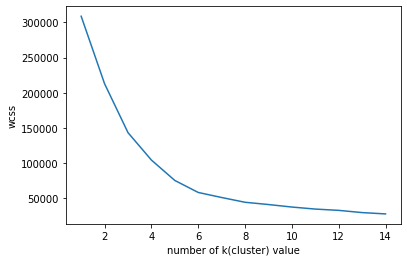

In [18]:
plt.plot(range(1,15), wcss)
plt.xlabel("number of k(cluster) value")
plt.ylabel("wcss")
plt.show()

Predict of X_data.

In [19]:
km_last = KMeans(n_clusters=5)

data_pred = km_last.fit_predict(X_data)

data_pred

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0, 3, 2, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 2, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3], dtype=int32)

I add the predict of X_data in the X_data in the code below.

In [20]:
X_data['cluster'] = data_pred
X_data

,Age,Annual_Income,Spending_Score,cluster
0,19,15,39,4
1,21,15,81,1
2,20,16,6,4
3,23,16,77,1
4,31,17,40,4
...,...,...,...,...
195,35,120,79,3
196,45,126,28,0
197,32,126,74,3
198,32,137,18,0


I separate five classes for visualization.

In [21]:
data0 = X_data[X_data['cluster']==0]
data1 = X_data[X_data['cluster']==1]
data2 = X_data[X_data['cluster']==2]
data3 = X_data[X_data['cluster']==3]
data4 = X_data[X_data['cluster']==4]

I visualize the dataset that I applied the model with the 3D plotly.

In [22]:
trace0= go.Scatter3d(
        x=data0.Annual_Income,
        y=data0.Spending_Score,
        z=data0.Age,
        mode="markers",
        marker=dict(
                    size=10,
                    color="rgb(255,0,0)",                                   # set color to an array/list of desired values  
        )
)
trace1= go.Scatter3d(
        x=data1.Annual_Income,
        y=data1.Spending_Score,
        z=data1.Age,
        mode="markers",
        marker=dict(
                    size=10,
                    color="rgb(0,255,0)",                                   # set color to an array/list of desired values  
        )
)
trace2= go.Scatter3d(
        x=data2.Annual_Income,
        y=data2.Spending_Score,
        z=data2.Age,
        mode="markers",
        marker=dict(
                    size=10,
                    color="rgb(0,0,255)",                                   # set color to an array/list of desired values  
        )
)
trace3= go.Scatter3d(
        x=data3.Annual_Income,
        y=data3.Spending_Score,
        z=data3.Age,
        mode="markers",
        marker=dict(
                    size=10,
                    color="rgb(255,255,0)",                                   # set color to an array/list of desired values  
        )
)
trace4= go.Scatter3d(
        x=data4.Annual_Income,
        y=data4.Spending_Score,
        z=data4.Age,
        mode="markers",
        marker=dict(
                    size=10,
                    color="rgb(127,0,255)",                                   # set color to an array/list of desired values  
        )
)

data_plot_km=[trace0,trace1,trace2,trace3,trace4]

layout = go.Layout(
    margin=dict(l=0, r=0, b=0, t=0))

fig=go.Figure(data = data_plot_km, layout = layout)
iplot(fig)
print("x : Annual_Income")
print("y : Spending_Score")
print("z : Age")

x : Annual_Income
y : Spending_Score
z : Age


## Hierarchical Clustering <a id = "dp3"></a>

**What is the Hierarchical Clustering?**<br>
Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.

I don't use the dataset that I applied the K-means model because I added the K-means result. Once again, I separate the columns that I will use it.

In [23]:
X_hc_data = data.iloc[:,1:]
X_hc_data

,Age,Annual_Income,Spending_Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


I visualize the X_hc_data with Plotly library. I do the dendrogram because The main output of Hierarchical Clustering is a dendrogram, which shows the hierarchical relationship between the clusters.

In [24]:
import plotly.figure_factory as ff
from scipy.cluster.hierarchy import linkage

merg = linkage(X_hc_data, method="ward")

fig = ff.create_dendrogram(merg)
fig.update_layout(width=1000, height=800)
fig.show()

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.



In the code below I am splitting my dataset into 5 clusters and I add the predict of X_hc_data in the X_hc_data in the code below.

In [25]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = "euclidean", linkage = "ward")
cluster = hc.fit_predict(X_hc_data)

X_hc_data["cluster"] = cluster

cluster

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [26]:
X_hc_data

,Age,Annual_Income,Spending_Score,cluster
0,19,15,39,4
1,21,15,81,3
2,20,16,6,4
3,23,16,77,3
4,31,17,40,4
...,...,...,...,...
195,35,120,79,2
196,45,126,28,1
197,32,126,74,2
198,32,137,18,1


I separate five classes for visualization.

In [27]:
hc_data0 = X_hc_data[X_hc_data['cluster']==0]
hc_data1 = X_hc_data[X_hc_data['cluster']==1]
hc_data2 = X_hc_data[X_hc_data['cluster']==2]
hc_data3 = X_hc_data[X_hc_data['cluster']==3]
hc_data4 = X_hc_data[X_hc_data['cluster']==4]

I visualize the dataset that I applied the model with the 3D plotly.

In [28]:
trace0= go.Scatter3d(
        x=hc_data0.Annual_Income,
        y=hc_data0.Spending_Score,
        z=hc_data0.Age,
        mode="markers",
        marker=dict(
                    size=10,
                    color="rgb(255,0,0)",                                   # set color to an array/list of desired values  
        )
)
trace1= go.Scatter3d(
        x=hc_data1.Annual_Income,
        y=hc_data1.Spending_Score,
        z=hc_data1.Age,
        mode="markers",
        marker=dict(
                    size=10,
                    color="rgb(0,255,0)",                                   # set color to an array/list of desired values  
        )
)
trace2= go.Scatter3d(
        x=hc_data2.Annual_Income,
        y=hc_data2.Spending_Score,
        z=hc_data2.Age,
        mode="markers",
        marker=dict(
                    size=10,
                    color="rgb(0,0,255)",                                   # set color to an array/list of desired values  
        )
)
trace3= go.Scatter3d(
        x=hc_data3.Annual_Income,
        y=hc_data3.Spending_Score,
        z=hc_data3.Age,
        mode="markers",
        marker=dict(
                    size=10,
                    color="rgb(255,255,0)",                                   # set color to an array/list of desired values  
        )
)
trace4= go.Scatter3d(
        x=hc_data4.Annual_Income,
        y=hc_data4.Spending_Score,
        z=hc_data4.Age,
        mode="markers",
        marker=dict(
                    size=10,
                    color="rgb(127,0,255)",                                   # set color to an array/list of desired values  
        )
)

data_plot_hc=[trace0,trace1,trace2,trace3,trace4]

layout = go.Layout(
    margin=dict(l=0, r=0, b=0, t=0))

fig=go.Figure(data = data_plot_hc, layout = layout)
iplot(fig)
print("x : Annual_Income")
print("y : Spending_Score")
print("z : Age")

x : Annual_Income
y : Spending_Score
z : Age


# CONCLUSION <a id = "5"></a>
I am learning the English language newly if I make an errata please advise me in the comment. Thank you for reading my notebook, your votes and your comments. I will be waiting for your advice.